In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import collections

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

torch.set_printoptions(edgeitems=2)
torch.manual_seed(123)

In [2]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

In [3]:
from torchvision import datasets, transforms
data_path = '../data-unversioned/p1ch6/'
cifar10 = datasets.CIFAR10(
    data_path, train=True, download=True,
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.4915, 0.4823, 0.4468),
                             (0.2470, 0.2435, 0.2616))
    ]))

100.0%


Extracting ../data-unversioned/p1ch6/cifar-10-python.tar.gz to ../data-unversioned/p1ch6/


In [4]:
cifar10_val = datasets.CIFAR10(
    data_path, train=False, download=True,
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.4915, 0.4823, 0.4468),
                             (0.2470, 0.2435, 0.2616))
    ]))

Files already downloaded and verified


In [5]:
label_map = {0: 0, 2: 1}
class_names = ['airplane', 'bird']
cifar2 = [(img, label_map[label])
          for img, label in cifar10
          if label in [0, 2]]
cifar2_val = [(img, label_map[label])
              for img, label in cifar10_val
              if label in [0, 2]]

In [6]:
connected_model = nn.Sequential(
            nn.Linear(3072, 1024),
            nn.Tanh(),
            nn.Linear(1024, 512),
            nn.Tanh(),
            nn.Linear(512, 128),
            nn.Tanh(),
            nn.Linear(128, 2))

In [14]:
next(iter(connected_model.parameters())).numel()

3145728

In [15]:
numel_list = [p.numel()
              for p in connected_model.parameters()
              if p.requires_grad == True]
sum(numel_list), numel_list

(3737474, [3145728, 1024, 524288, 512, 65536, 128, 256, 2])

In [16]:
first_model = nn.Sequential(
                nn.Linear(3072, 512),
                nn.Tanh(),
                nn.Linear(512, 2),
                nn.LogSoftmax(dim=1))

In [17]:
numel_list = [p.numel() for p in first_model.parameters()]
sum(numel_list), numel_list

(1574402, [1572864, 512, 1024, 2])

In [25]:
linear = nn.Linear(3072, 1024)

linear.weight.shape, linear.bias.shape


(torch.Size([1024, 3072]), torch.Size([1024]))

In [26]:
conv = nn.Conv2d(3, 16, kernel_size=3) # <1>
conv

Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1))

In [27]:
conv.weight.shape, conv.bias.shape

(torch.Size([16, 3, 3, 3]), torch.Size([16]))

In [37]:
img, _ = cifar2[0]
print(class_names[_])
output = conv(img.unsqueeze(0))
img.unsqueeze(0).shape, output.shape

bird


(torch.Size([1, 3, 32, 32]), torch.Size([1, 1, 32, 32]))

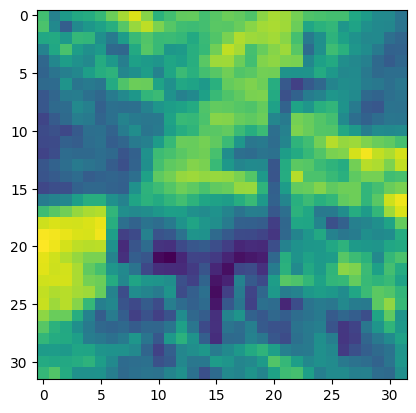

In [38]:
plt.imshow(img.mean(0), )
plt.show()

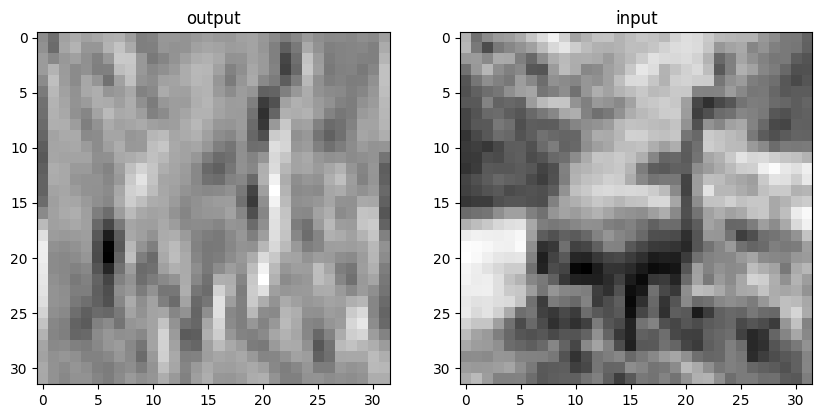

In [39]:
plt.figure(figsize=(10, 4.8))  # bookskip
ax1 = plt.subplot(1, 2, 1)   # bookskip
plt.title('output')   # bookskip
plt.imshow(output[0, 0].detach(), cmap='gray')
plt.subplot(1, 2, 2, sharex=ax1, sharey=ax1)  # bookskip
plt.imshow(img.mean(0), cmap='gray')  # bookskip
plt.title('input')  # bookskip
# plt.savefig('Ch8_F2_PyTorch.png')  # bookskip
plt.show()

In [40]:
conv = nn.Conv2d(3, 1, kernel_size=3, padding=1) # <1>
output = conv(img.unsqueeze(0))
img.unsqueeze(0).shape, output.shape

(torch.Size([1, 3, 32, 32]), torch.Size([1, 1, 32, 32]))

In [41]:
with torch.no_grad():
    conv.bias.zero_()
    
with torch.no_grad():
    conv.weight.fill_(1.0 / 9.0)

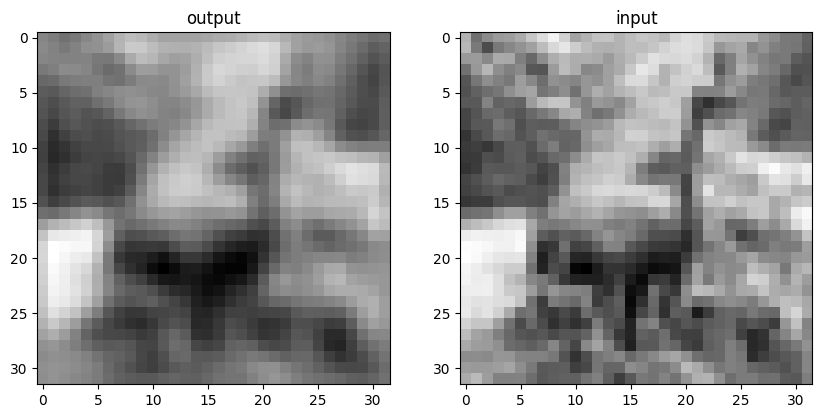

In [42]:
output = conv(img.unsqueeze(0))
plt.figure(figsize=(10, 4.8))  # bookskip
ax1 = plt.subplot(1, 2, 1)   # bookskip
plt.title('output')   # bookskip
plt.imshow(output[0, 0].detach(), cmap='gray')
plt.subplot(1, 2, 2, sharex=ax1, sharey=ax1)  # bookskip
plt.imshow(img.mean(0), cmap='gray')  # bookskip
plt.title('input')  # bookskip
plt.savefig('Ch8_F4_PyTorch.png')  # bookskip
plt.show()

In [43]:
conv = nn.Conv2d(3, 1, kernel_size=3, padding=1)

with torch.no_grad():
    conv.weight[:] = torch.tensor([[-1.0, 0.0, 1.0],
                                   [-1.0, 0.0, 1.0],
                                   [-1.0, 0.0, 1.0]])
    conv.bias.zero_()

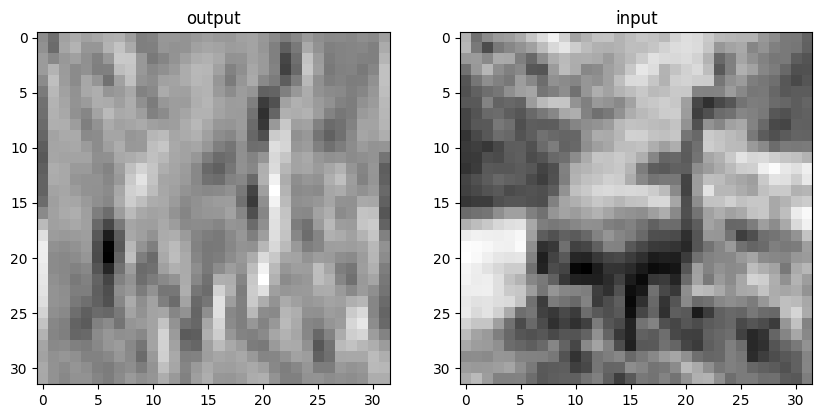

In [44]:
output = conv(img.unsqueeze(0))
plt.figure(figsize=(10, 4.8))  # bookskip
ax1 = plt.subplot(1, 2, 1)   # bookskip
plt.title('output')   # bookskip
plt.imshow(output[0, 0].detach(), cmap='gray')
plt.subplot(1, 2, 2, sharex=ax1, sharey=ax1)  # bookskip
plt.imshow(img.mean(0), cmap='gray')  # bookskip
plt.title('input')  # bookskip
plt.savefig('Ch8_F5_PyTorch.png')  # bookskip
plt.show()

In [45]:
pool = nn.MaxPool2d(2)
output = pool(img.unsqueeze(0))

img.unsqueeze(0).shape, output.shape

(torch.Size([1, 3, 32, 32]), torch.Size([1, 3, 16, 16]))

In [46]:
model = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=3, padding=1),
            nn.Tanh(),
            nn.MaxPool2d(2),
            nn.Conv2d(16, 8, kernel_size=3, padding=1),
            nn.Tanh(),
            nn.MaxPool2d(2),
            # ...
            )

In [47]:
model = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=3, padding=1),
            nn.Tanh(),
            nn.MaxPool2d(2),
            nn.Conv2d(16, 8, kernel_size=3, padding=1),
            nn.Tanh(),
            nn.MaxPool2d(2),
            # ... <1>
            nn.Linear(8 * 8 * 8, 32),
            nn.Tanh(),
            nn.Linear(32, 2))

In [48]:
numel_list = [p.numel() for p in model.parameters()]
sum(numel_list), numel_list

(18090, [432, 16, 1152, 8, 16384, 32, 64, 2])

In [49]:
model(img.unsqueeze(0))

RuntimeError: mat1 and mat2 shapes cannot be multiplied (64x8 and 512x32)

In [51]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
        self.act1 = nn.Tanh()
        self.pool1 = nn.MaxPool2d(2)
        self.conv2 = nn.Conv2d(16, 8, kernel_size=3, padding=1)
        self.act2 = nn.Tanh()
        self.pool2 = nn.MaxPool2d(2)
        self.fc1 = nn.Linear(8 * 8 * 8, 32)
        self.act3 = nn.Tanh()
        self.fc2 = nn.Linear(32, 2)

    def forward(self, x):
        out = self.pool1(self.act1(self.conv1(x)))
        out = self.pool2(self.act2(self.conv2(out)))
        out = out.view(-1, 8 * 8 * 8) # <1>
        out = self.act3(self.fc1(out))
        out = self.fc2(out)
        return out

In [52]:
cnn_parametersmodel = Net()

numel_list = [p.numel() for p in model.parameters()]
sum(numel_list), numel_list

(18090, [432, 16, 1152, 8, 16384, 32, 64, 2])

In [53]:
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(16, 8, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(8 * 8 * 8, 32)
        self.fc2 = nn.Linear(32, 2)
        
    def forward(self, x):
        out = F.max_pool2d(torch.tanh(self.conv1(x)), 2)
        out = F.max_pool2d(torch.tanh(self.conv2(out)), 2)
        out = out.view(-1, 8 * 8 * 8)
        out = torch.tanh(self.fc1(out))
        out = self.fc2(out)
        return out

In [54]:
model = Net()
model(img.unsqueeze(0))

tensor([[-0.1246,  0.0680]], grad_fn=<AddmmBackward0>)

In [55]:
import datetime  # <1>

def training_loop(n_epochs, optimizer, model, loss_fn, train_loader):
    for epoch in range(1, n_epochs + 1):  # <2>
        loss_train = 0.0
        for imgs, labels in train_loader:  # <3>
            
            outputs = model(imgs)  # <4>
            
            loss = loss_fn(outputs, labels)  # <5>

            optimizer.zero_grad()  # <6>
            
            loss.backward()  # <7>
            
            optimizer.step()  # <8>

            loss_train += loss.item()  # <9>

        if epoch == 1 or epoch % 10 == 0:
            print('{} Epoch {}, Training loss {}'.format(
                datetime.datetime.now(), epoch,
                loss_train / len(train_loader)))  # <10>

In [56]:
train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64,
                                           shuffle=True)  # <1>

model = Net()  #  <2>
optimizer = optim.SGD(model.parameters(), lr=1e-2)  #  <3>
loss_fn = nn.CrossEntropyLoss()  #  <4>

training_loop(  # <5>
    n_epochs = 100,
    optimizer = optimizer,
    model = model,
    loss_fn = loss_fn,
    train_loader = train_loader,
)

2022-12-13 08:48:43.694488 Epoch 1, Training loss 0.5927681928607309
2022-12-13 08:48:51.540370 Epoch 10, Training loss 0.33801819526465837
2022-12-13 08:49:00.215423 Epoch 20, Training loss 0.29060899338145163
2022-12-13 08:49:09.286188 Epoch 30, Training loss 0.26138295669844197
2022-12-13 08:49:17.995753 Epoch 40, Training loss 0.23708791119657505
2022-12-13 08:49:26.627443 Epoch 50, Training loss 0.2168703353518893
2022-12-13 08:49:35.214232 Epoch 60, Training loss 0.20147894621844503
2022-12-13 08:49:44.244001 Epoch 70, Training loss 0.18702453526721638
2022-12-13 08:49:52.956425 Epoch 80, Training loss 0.17116276986280066
2022-12-13 08:50:01.838324 Epoch 90, Training loss 0.15796215889180543
2022-12-13 08:50:11.275265 Epoch 100, Training loss 0.14694255675859513


In [57]:
train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64,
                                           shuffle=False)
val_loader = torch.utils.data.DataLoader(cifar2_val, batch_size=64,
                                         shuffle=False)

def validate(model, train_loader, val_loader):
    for name, loader in [("train", train_loader), ("val", val_loader)]:
        correct = 0
        total = 0

        with torch.no_grad():  # <1>
            for imgs, labels in loader:
                outputs = model(imgs)
                _, predicted = torch.max(outputs, dim=1) # <2>
                total += labels.shape[0]  # <3>
                correct += int((predicted == labels).sum())  # <4>

        print("Accuracy {}: {:.2f}".format(name , correct / total))

validate(model, train_loader, val_loader)

Accuracy train: 0.91
Accuracy val: 0.85


In [58]:
torch.save(model.state_dict(), data_path + 'birds_vs_airplanes.pt')

In [59]:
loaded_model = Net()  # <1>
loaded_model.load_state_dict(torch.load(data_path
                                        + 'birds_vs_airplanes.pt'))

<All keys matched successfully>

In [60]:
device = (torch.device('cuda') if torch.cuda.is_available()
          else torch.device('cpu'))
print(f"Training on device {device}.")

Training on device cpu.


In [61]:
import datetime

def training_loop(n_epochs, optimizer, model, loss_fn, train_loader):
    for epoch in range(1, n_epochs + 1):
        loss_train = 0.0
        for imgs, labels in train_loader:
            imgs = imgs.to(device=device)  # <1>
            labels = labels.to(device=device)
            outputs = model(imgs)
            loss = loss_fn(outputs, labels)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            loss_train += loss.item()

        if epoch == 1 or epoch % 10 == 0:
            print('{} Epoch {}, Training loss {}'.format(
                datetime.datetime.now(), epoch,
                loss_train / len(train_loader)))

In [62]:
train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64,
                                           shuffle=True)

model = Net().to(device=device)  # <1>
optimizer = optim.SGD(model.parameters(), lr=1e-2)
loss_fn = nn.CrossEntropyLoss()

training_loop(
    n_epochs = 100,
    optimizer = optimizer,
    model = model,
    loss_fn = loss_fn,
    train_loader = train_loader,
)

2022-12-13 08:51:16.463601 Epoch 1, Training loss 0.574523356689769
2022-12-13 08:51:24.881254 Epoch 10, Training loss 0.3373268130858233
2022-12-13 08:51:33.556059 Epoch 20, Training loss 0.2946121989257017
2022-12-13 08:51:43.339174 Epoch 30, Training loss 0.2693840099178302
2022-12-13 08:51:52.352491 Epoch 40, Training loss 0.24702919820311722
2022-12-13 08:52:01.084411 Epoch 50, Training loss 0.22714332102020834
2022-12-13 08:52:09.795010 Epoch 60, Training loss 0.21187207344800804
2022-12-13 08:52:18.499121 Epoch 70, Training loss 0.1997749358890163
2022-12-13 08:52:27.233234 Epoch 80, Training loss 0.18567065007177888
2022-12-13 08:52:35.943564 Epoch 90, Training loss 0.17307816740054233
2022-12-13 08:52:44.665797 Epoch 100, Training loss 0.15948522062438308


In [63]:
train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64,
                                           shuffle=False)
val_loader = torch.utils.data.DataLoader(cifar2_val, batch_size=64,
                                         shuffle=False)
all_acc_dict = collections.OrderedDict()

def validate(model, train_loader, val_loader):
    accdict = {}
    for name, loader in [("train", train_loader), ("val", val_loader)]:
        correct = 0
        total = 0

        with torch.no_grad():
            for imgs, labels in loader:
                imgs = imgs.to(device=device)
                labels = labels.to(device=device)
                outputs = model(imgs)
                _, predicted = torch.max(outputs, dim=1) # <1>
                total += labels.shape[0]
                correct += int((predicted == labels).sum())

        print("Accuracy {}: {:.2f}".format(name , correct / total))
        accdict[name] = correct / total
    return accdict

all_acc_dict["baseline"] = validate(model, train_loader, val_loader)

Accuracy train: 0.94
Accuracy val: 0.89


In [64]:
loaded_model = Net().to(device=device)
loaded_model.load_state_dict(torch.load(data_path
                                        + 'birds_vs_airplanes.pt',
                                        map_location=device))

<All keys matched successfully>

In [65]:
class NetWidth(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 16, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(16 * 8 * 8, 32)
        self.fc2 = nn.Linear(32, 2)
        
    def forward(self, x):
        out = F.max_pool2d(torch.tanh(self.conv1(x)), 2)
        out = F.max_pool2d(torch.tanh(self.conv2(out)), 2)
        out = out.view(-1, 16 * 8 * 8)
        out = torch.tanh(self.fc1(out))
        out = self.fc2(out)
        return out

In [66]:
model = NetWidth().to(device=device)
optimizer = optim.SGD(model.parameters(), lr=1e-2)
loss_fn = nn.CrossEntropyLoss()

training_loop(
    n_epochs = 100,
    optimizer = optimizer,
    model = model,
    loss_fn = loss_fn,
    train_loader = train_loader,
)

validate(model, train_loader, val_loader)

2022-12-13 08:55:16.103196 Epoch 1, Training loss 0.552530067931315
2022-12-13 08:55:34.082986 Epoch 10, Training loss 0.31555014032467155
2022-12-13 08:55:55.248594 Epoch 20, Training loss 0.27645086131657765
2022-12-13 08:56:16.564233 Epoch 30, Training loss 0.24723200172565546
2022-12-13 08:56:37.611067 Epoch 40, Training loss 0.2218666471493472
2022-12-13 08:56:57.359450 Epoch 50, Training loss 0.19713952999775577
2022-12-13 08:57:18.166807 Epoch 60, Training loss 0.17338293748106925
2022-12-13 08:57:39.372318 Epoch 70, Training loss 0.15130232336225025
2022-12-13 08:57:59.906189 Epoch 80, Training loss 0.13060096762837117
2022-12-13 08:58:22.164851 Epoch 90, Training loss 0.1107603751455143
2022-12-13 08:58:43.071489 Epoch 100, Training loss 0.09219175568858909
Accuracy train: 0.96
Accuracy val: 0.88


{'train': 0.9592, 'val': 0.8835}

In [67]:
class NetWidth(nn.Module):
    def __init__(self, n_chans1=32):
        super().__init__()
        self.n_chans1 = n_chans1
        self.conv1 = nn.Conv2d(3, n_chans1, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(n_chans1, n_chans1 // 2, kernel_size=3,
                               padding=1)
        self.fc1 = nn.Linear(8 * 8 * n_chans1 // 2, 32)
        self.fc2 = nn.Linear(32, 2)
        
    def forward(self, x):
        out = F.max_pool2d(torch.tanh(self.conv1(x)), 2)
        out = F.max_pool2d(torch.tanh(self.conv2(out)), 2)
        out = out.view(-1, 8 * 8 * self.n_chans1 // 2)
        out = torch.tanh(self.fc1(out))
        out = self.fc2(out)
        return out


In [68]:
model = NetWidth(n_chans1=32).to(device=device)
optimizer = optim.SGD(model.parameters(), lr=1e-2)
loss_fn = nn.CrossEntropyLoss()

training_loop(
    n_epochs = 100,
    optimizer = optimizer,
    model = model,
    loss_fn = loss_fn,
    train_loader = train_loader,
)

all_acc_dict["width"] = validate(model, train_loader, val_loader)

2022-12-13 08:58:46.432319 Epoch 1, Training loss 0.5529306906803398
2022-12-13 08:59:04.821578 Epoch 10, Training loss 0.31778736754207854
2022-12-13 08:59:25.158033 Epoch 20, Training loss 0.2720367223214192
2022-12-13 08:59:45.191773 Epoch 30, Training loss 0.2407074609095124
2022-12-13 09:00:05.489122 Epoch 40, Training loss 0.21260417694119133
2022-12-13 09:00:24.563001 Epoch 50, Training loss 0.18567010850473575
2022-12-13 09:00:48.184933 Epoch 60, Training loss 0.16002702433022725
2022-12-13 09:01:08.481575 Epoch 70, Training loss 0.13626204986291326
2022-12-13 09:01:28.253903 Epoch 80, Training loss 0.11446813750229064
2022-12-13 09:01:48.695145 Epoch 90, Training loss 0.09479602715771669
2022-12-13 09:02:09.707349 Epoch 100, Training loss 0.07756226814713828
Accuracy train: 0.97
Accuracy val: 0.89


In [69]:
sum(p.numel() for p in model.parameters())

38386

In [70]:
def training_loop_l2reg(n_epochs, optimizer, model, loss_fn,
                        train_loader):
    for epoch in range(1, n_epochs + 1):
        loss_train = 0.0
        for imgs, labels in train_loader:
            imgs = imgs.to(device=device)
            labels = labels.to(device=device)
            outputs = model(imgs)
            loss = loss_fn(outputs, labels)

            l2_lambda = 0.001
            l2_norm = sum(p.pow(2.0).sum()
                          for p in model.parameters())  # <1>
            loss = loss + l2_lambda * l2_norm

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            loss_train += loss.item()
        if epoch == 1 or epoch % 10 == 0:
            print('{} Epoch {}, Training loss {}'.format(
                datetime.datetime.now(), epoch,
                loss_train / len(train_loader)))


In [71]:
model = Net().to(device=device)
optimizer = optim.SGD(model.parameters(), lr=1e-2)
loss_fn = nn.CrossEntropyLoss()

training_loop_l2reg(
    n_epochs = 100,
    optimizer = optimizer,
    model = model,
    loss_fn = loss_fn,
    train_loader = train_loader,
)
all_acc_dict["l2 reg"] = validate(model, train_loader, val_loader)

2022-12-13 09:02:47.953614 Epoch 1, Training loss 0.61446334336214
2022-12-13 09:02:56.628355 Epoch 10, Training loss 0.3466928895491703
2022-12-13 09:03:06.569415 Epoch 20, Training loss 0.3183350999643848
2022-12-13 09:03:16.147399 Epoch 30, Training loss 0.2983636896891199
2022-12-13 09:03:26.081446 Epoch 40, Training loss 0.2822265111526866
2022-12-13 09:03:36.791924 Epoch 50, Training loss 0.26961871820270633
2022-12-13 09:03:47.522857 Epoch 60, Training loss 0.2579595979042114
2022-12-13 09:03:58.260535 Epoch 70, Training loss 0.2467783855594647
2022-12-13 09:04:08.792064 Epoch 80, Training loss 0.2361375870313614
2022-12-13 09:04:18.666280 Epoch 90, Training loss 0.22631242263848614
2022-12-13 09:04:28.516554 Epoch 100, Training loss 0.21695783838724633
Accuracy train: 0.92
Accuracy val: 0.89


In [72]:
for k, v in all_acc_dict.items():
    print(f"{k}: {v}")

baseline: {'train': 0.9381, 'val': 0.8915}
width: {'train': 0.968, 'val': 0.89}
l2 reg: {'train': 0.9191, 'val': 0.8885}


In [73]:
class NetDropout(nn.Module):
    def __init__(self, n_chans1=32):
        super().__init__()
        self.n_chans1 = n_chans1
        self.conv1 = nn.Conv2d(3, n_chans1, kernel_size=3, padding=1)
        self.conv1_dropout = nn.Dropout2d(p=0.4)
        self.conv2 = nn.Conv2d(n_chans1, n_chans1 // 2, kernel_size=3,
                               padding=1)
        self.conv2_dropout = nn.Dropout2d(p=0.4)
        self.fc1 = nn.Linear(8 * 8 * n_chans1 // 2, 32)
        self.fc2 = nn.Linear(32, 2)
        
    def forward(self, x):
        out = F.max_pool2d(torch.tanh(self.conv1(x)), 2)
        out = self.conv1_dropout(out)
        out = F.max_pool2d(torch.tanh(self.conv2(out)), 2)
        out = self.conv2_dropout(out)
        out = out.view(-1, 8 * 8 * self.n_chans1 // 2)
        out = torch.tanh(self.fc1(out))
        out = self.fc2(out)
        return out

In [74]:
model = NetDropout(n_chans1=32).to(device=device)
optimizer = optim.SGD(model.parameters(), lr=1e-2)
loss_fn = nn.CrossEntropyLoss()

training_loop(
    n_epochs = 100,
    optimizer = optimizer,
    model = model,
    loss_fn = loss_fn,
    train_loader = train_loader,
)
all_acc_dict["dropout"] = validate(model, train_loader, val_loader)

2022-12-13 09:05:53.454046 Epoch 1, Training loss 0.5890609029751674
2022-12-13 09:06:11.303128 Epoch 10, Training loss 0.38191229266345883
2022-12-13 09:06:30.215562 Epoch 20, Training loss 0.3464082015357959
2022-12-13 09:06:49.114722 Epoch 30, Training loss 0.332245775373878
2022-12-13 09:07:09.144191 Epoch 40, Training loss 0.30912665272973905
2022-12-13 09:07:29.029767 Epoch 50, Training loss 0.3003825545310974
2022-12-13 09:07:49.438834 Epoch 60, Training loss 0.2816577067800388
2022-12-13 09:08:10.281133 Epoch 70, Training loss 0.27146824881149706
2022-12-13 09:08:30.089170 Epoch 80, Training loss 0.2645565807629543
2022-12-13 09:08:51.154745 Epoch 90, Training loss 0.2494973871073905
2022-12-13 09:09:12.386507 Epoch 100, Training loss 0.24764407084436174
Accuracy train: 0.91
Accuracy val: 0.88


In [75]:
class NetBatchNorm(nn.Module):
    def __init__(self, n_chans1=32):
        super().__init__()
        self.n_chans1 = n_chans1
        self.conv1 = nn.Conv2d(3, n_chans1, kernel_size=3, padding=1)
        self.conv1_batchnorm = nn.BatchNorm2d(num_features=n_chans1)
        self.conv2 = nn.Conv2d(n_chans1, n_chans1 // 2, kernel_size=3, 
                               padding=1)
        self.conv2_batchnorm = nn.BatchNorm2d(num_features=n_chans1 // 2)
        self.fc1 = nn.Linear(8 * 8 * n_chans1 // 2, 32)
        self.fc2 = nn.Linear(32, 2)
        
    def forward(self, x):
        out = self.conv1_batchnorm(self.conv1(x))
        out = F.max_pool2d(torch.tanh(out), 2)
        out = self.conv2_batchnorm(self.conv2(out))
        out = F.max_pool2d(torch.tanh(out), 2)
        out = out.view(-1, 8 * 8 * self.n_chans1 // 2)
        out = torch.tanh(self.fc1(out))
        out = self.fc2(out)
        return out

In [76]:
model = NetBatchNorm(n_chans1=32).to(device=device)
optimizer = optim.SGD(model.parameters(), lr=1e-2)
loss_fn = nn.CrossEntropyLoss()

training_loop(
    n_epochs = 100,
    optimizer = optimizer,
    model = model,
    loss_fn = loss_fn,
    train_loader = train_loader,
)
all_acc_dict["batch_norm"] = validate(model, train_loader, val_loader)

2022-12-13 09:09:25.968067 Epoch 1, Training loss 0.4493408584670656
2022-12-13 09:09:51.030518 Epoch 10, Training loss 0.2697532007079216
2022-12-13 09:10:17.924832 Epoch 20, Training loss 0.20823796468365724
2022-12-13 09:10:48.080655 Epoch 30, Training loss 0.15500294331722198
2022-12-13 09:11:15.545646 Epoch 40, Training loss 0.10899361343995022
2022-12-13 09:11:43.272684 Epoch 50, Training loss 0.07310204862788984
2022-12-13 09:12:08.998642 Epoch 60, Training loss 0.04635359230599585
2022-12-13 09:12:35.783664 Epoch 70, Training loss 0.02802817444880582
2022-12-13 09:13:02.496886 Epoch 80, Training loss 0.01666055640182013
2022-12-13 09:13:28.527083 Epoch 90, Training loss 0.010760723488630762
2022-12-13 09:13:57.332120 Epoch 100, Training loss 0.007244360260962016
Accuracy train: 0.99
Accuracy val: 0.87


In [77]:
class NetDepth(nn.Module):
    def __init__(self, n_chans1=32):
        super().__init__()
        self.n_chans1 = n_chans1
        self.conv1 = nn.Conv2d(3, n_chans1, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(n_chans1, n_chans1 // 2, kernel_size=3,
                               padding=1)
        self.conv3 = nn.Conv2d(n_chans1 // 2, n_chans1 // 2,
                               kernel_size=3, padding=1)
        self.fc1 = nn.Linear(4 * 4 * n_chans1 // 2, 32)
        self.fc2 = nn.Linear(32, 2)
        
    def forward(self, x):
        out = F.max_pool2d(torch.relu(self.conv1(x)), 2)
        out = F.max_pool2d(torch.relu(self.conv2(out)), 2)
        out = F.max_pool2d(torch.relu(self.conv3(out)), 2)
        out = out.view(-1, 4 * 4 * self.n_chans1 // 2)
        out = torch.relu(self.fc1(out))
        out = self.fc2(out)
        return out

In [78]:
model = NetDepth(n_chans1=32).to(device=device)
optimizer = optim.SGD(model.parameters(), lr=1e-2)
loss_fn = nn.CrossEntropyLoss()

training_loop(
    n_epochs = 100,
    optimizer = optimizer,
    model = model,
    loss_fn = loss_fn,
    train_loader = train_loader,
)
all_acc_dict["depth"] = validate(model, train_loader, val_loader)

2022-12-13 09:15:56.514175 Epoch 1, Training loss 0.6918405803145876
2022-12-13 09:16:14.367711 Epoch 10, Training loss 0.35878853727677823
2022-12-13 09:16:33.901415 Epoch 20, Training loss 0.308088962344607
2022-12-13 09:16:54.100929 Epoch 30, Training loss 0.276755972842502
2022-12-13 09:17:15.893480 Epoch 40, Training loss 0.2445664133425731
2022-12-13 09:17:38.466198 Epoch 50, Training loss 0.21576039084962978
2022-12-13 09:17:58.324566 Epoch 60, Training loss 0.18820987319111065
2022-12-13 09:18:18.606432 Epoch 70, Training loss 0.16055025625380742
2022-12-13 09:18:38.513725 Epoch 80, Training loss 0.13270404650147555
2022-12-13 09:18:58.077379 Epoch 90, Training loss 0.10592969454777469
2022-12-13 09:19:17.621713 Epoch 100, Training loss 0.08063631386134275
Accuracy train: 0.96
Accuracy val: 0.89


In [79]:
class NetRes(nn.Module):
    def __init__(self, n_chans1=32):
        super().__init__()
        self.n_chans1 = n_chans1
        self.conv1 = nn.Conv2d(3, n_chans1, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(n_chans1, n_chans1 // 2, kernel_size=3,
                               padding=1)
        self.conv3 = nn.Conv2d(n_chans1 // 2, n_chans1 // 2,
                               kernel_size=3, padding=1)
        self.fc1 = nn.Linear(4 * 4 * n_chans1 // 2, 32)
        self.fc2 = nn.Linear(32, 2)
        
    def forward(self, x):
        out = F.max_pool2d(torch.relu(self.conv1(x)), 2)
        out = F.max_pool2d(torch.relu(self.conv2(out)), 2)
        out1 = out
        out = F.max_pool2d(torch.relu(self.conv3(out)) + out1, 2)
        out = out.view(-1, 4 * 4 * self.n_chans1 // 2)
        out = torch.relu(self.fc1(out))
        out = self.fc2(out)
        return out

In [80]:
model = NetRes(n_chans1=32).to(device=device)
optimizer = optim.SGD(model.parameters(), lr=1e-2)
loss_fn = nn.CrossEntropyLoss()

training_loop(
    n_epochs = 100,
    optimizer = optimizer,
    model = model,
    loss_fn = loss_fn,
    train_loader = train_loader,
)
all_acc_dict["res"] = validate(model, train_loader, val_loader)

2022-12-13 09:19:20.632943 Epoch 1, Training loss 0.6316096773193141
2022-12-13 09:19:38.140342 Epoch 10, Training loss 0.33125241167226416
2022-12-13 09:19:57.897089 Epoch 20, Training loss 0.28592715265264934
2022-12-13 09:20:18.067000 Epoch 30, Training loss 0.24931617546233403
2022-12-13 09:20:37.701103 Epoch 40, Training loss 0.21721971893955946
2022-12-13 09:20:57.060965 Epoch 50, Training loss 0.18875728542827497
2022-12-13 09:21:16.786683 Epoch 60, Training loss 0.16255689132365453
2022-12-13 09:21:38.578822 Epoch 70, Training loss 0.13717936788489865
2022-12-13 09:21:59.395150 Epoch 80, Training loss 0.11236683790613512
2022-12-13 09:22:18.943922 Epoch 90, Training loss 0.08953471469936097
2022-12-13 09:22:38.340498 Epoch 100, Training loss 0.073469316634308
Accuracy train: 0.97
Accuracy val: 0.90


In [81]:
class ResBlock(nn.Module):
    def __init__(self, n_chans):
        super(ResBlock, self).__init__()
        self.conv = nn.Conv2d(n_chans, n_chans, kernel_size=3,
                              padding=1, bias=False)  # <1>
        self.batch_norm = nn.BatchNorm2d(num_features=n_chans)
        torch.nn.init.kaiming_normal_(self.conv.weight,
                                      nonlinearity='relu')  # <2>
        torch.nn.init.constant_(self.batch_norm.weight, 0.5)
        torch.nn.init.zeros_(self.batch_norm.bias)

    def forward(self, x):
        out = self.conv(x)
        out = self.batch_norm(out)
        out = torch.relu(out)
        return out + x

In [82]:
class NetResDeep(nn.Module):
    def __init__(self, n_chans1=32, n_blocks=10):
        super().__init__()
        self.n_chans1 = n_chans1
        self.conv1 = nn.Conv2d(3, n_chans1, kernel_size=3, padding=1)
        self.resblocks = nn.Sequential(
            *(n_blocks * [ResBlock(n_chans=n_chans1)]))
        self.fc1 = nn.Linear(8 * 8 * n_chans1, 32)
        self.fc2 = nn.Linear(32, 2)
        
    def forward(self, x):
        out = F.max_pool2d(torch.relu(self.conv1(x)), 2)
        out = self.resblocks(out)
        out = F.max_pool2d(out, 2)
        out = out.view(-1, 8 * 8 * self.n_chans1)
        out = torch.relu(self.fc1(out))
        out = self.fc2(out)
        return out
    


In [83]:
model = NetResDeep(n_chans1=32, n_blocks=100).to(device=device)
optimizer = optim.SGD(model.parameters(), lr=3e-3)
loss_fn = nn.CrossEntropyLoss()

training_loop(
    n_epochs = 100,
    optimizer = optimizer,
    model = model,
    loss_fn = loss_fn,
    train_loader = train_loader,
)
all_acc_dict["res deep"] = validate(model, train_loader, val_loader)

2022-12-13 09:23:46.820475 Epoch 1, Training loss 1.8203312481284901
2022-12-13 09:34:07.844310 Epoch 10, Training loss 0.30162277191307896
2022-12-13 09:45:40.074664 Epoch 20, Training loss 0.2389292102425721


KeyboardInterrupt: 

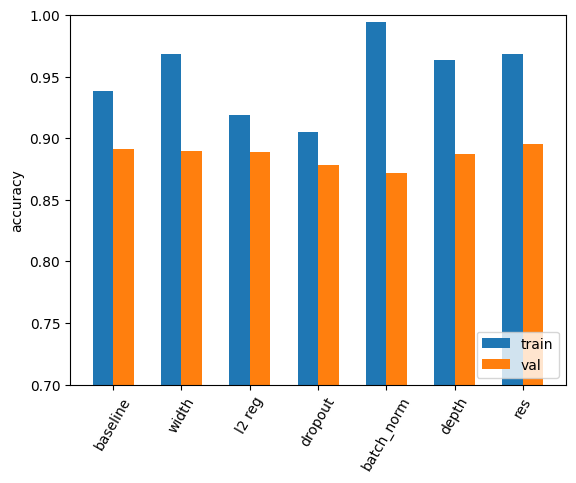

In [84]:
trn_acc = [v['train'] for k, v in all_acc_dict.items()]
val_acc = [v['val'] for k, v in all_acc_dict.items()]

width =0.3
plt.bar(np.arange(len(trn_acc)), trn_acc, width=width, label='train')
plt.bar(np.arange(len(val_acc))+ width, val_acc, width=width, label='val')
plt.xticks(np.arange(len(val_acc))+ width/2, list(all_acc_dict.keys()),
           rotation=60)
plt.ylabel('accuracy')
plt.legend(loc='lower right')
plt.ylim(0.7, 1)
plt.savefig('accuracy_comparison.png', bbox_inches='tight')
plt.show()
